In [16]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score


In [2]:
# Load the dataset
df = pd.read_csv('/kaggle/input/student-stress-and-stress/student_stress_addiction_v3.csv')

In [3]:
# Display the first few rows of the dataset to verify it's loaded correctly
print(df.head())

   Unnamed: 0      Timestamp   Age  Gender Is_Student  \
0         0.0  1/1/2025 0:00  24.0  Female        Yes   
1         1.0  1/1/2025 0:01  21.0  Female        Yes   
2         2.0  1/1/2025 0:02  28.0    Male        Yes   
3         4.0  1/1/2025 0:04  22.0  Female        Yes   
4         5.0  1/1/2025 0:05  24.0  Female        Yes   

   Self_Reported_Stress_Level  Overall_Stress_Level  \
0                         7.0                   3.0   
1                         4.0                   3.0   
2                         8.0                   5.0   
3                         5.0                   4.0   
4                         7.0                   5.0   

   Negative_Impact_On_Academics  Avg_Sleep_Hours_Per_Night  \
0                           3.0                        7.0   
1                           2.0                        8.0   
2                           4.0                        7.0   
3                           3.0                        7.0   
4               

In [4]:
# Drop unnecessary columns
columns_to_drop = ['Unnamed: 0', 'Timestamp', 'Age', 'Gender','Is_Student']  # Replace with the actual column names you want to drop
df = df.drop(columns=columns_to_drop)

In [5]:
# Find and display the number of null values in each column
null_values = df.isnull().sum()
# Display the result
print(null_values)

Self_Reported_Stress_Level       1951
Overall_Stress_Level             1944
Negative_Impact_On_Academics     1938
Avg_Sleep_Hours_Per_Night        1938
Anxiety_Away_From_Phone          1938
Daily_Screen_Time_Mins           1938
Self_Reported_Addiction_Scale    1938
Night_Usage_Mins                 1938
Attempts_To_Reduce_Usage         1938
Unlocks_Per_Day                  1938
Total_Notifications_Per_Day      1938
Stress_Level                     1938
Addiction_Level                  1938
dtype: int64


In [6]:
# Fill null values with the mean of each column
df = df.fillna(df.mean())

# Display the first few rows of the updated dataset
print(df.head())


   Self_Reported_Stress_Level  Overall_Stress_Level  \
0                         7.0                   3.0   
1                         4.0                   3.0   
2                         8.0                   5.0   
3                         5.0                   4.0   
4                         7.0                   5.0   

   Negative_Impact_On_Academics  Avg_Sleep_Hours_Per_Night  \
0                           3.0                        7.0   
1                           2.0                        8.0   
2                           4.0                        7.0   
3                           3.0                        7.0   
4                           4.0                        6.0   

   Anxiety_Away_From_Phone  Daily_Screen_Time_Mins  \
0                      1.0                   160.0   
1                      4.0                   430.0   
2                      3.0                   490.0   
3                      4.0                   368.0   
4                      3.0

In [7]:
# Find and display the number of null values in each column
null_values = df.isnull().sum()
# Display the result
print(null_values)

Self_Reported_Stress_Level       0
Overall_Stress_Level             0
Negative_Impact_On_Academics     0
Avg_Sleep_Hours_Per_Night        0
Anxiety_Away_From_Phone          0
Daily_Screen_Time_Mins           0
Self_Reported_Addiction_Scale    0
Night_Usage_Mins                 0
Attempts_To_Reduce_Usage         0
Unlocks_Per_Day                  0
Total_Notifications_Per_Day      0
Stress_Level                     0
Addiction_Level                  0
dtype: int64


In [8]:
# Feature and target variables for Stress and Addiction prediction
X_stress = df[['Self_Reported_Stress_Level', 'Overall_Stress_Level', 'Negative_Impact_On_Academics',
               'Avg_Sleep_Hours_Per_Night', 'Anxiety_Away_From_Phone', 'Daily_Screen_Time_Mins']]
y_stress = df['Stress_Level']

X_addiction = df[['Self_Reported_Addiction_Scale', 'Daily_Screen_Time_Mins', 'Night_Usage_Mins',
                  'Attempts_To_Reduce_Usage', 'Unlocks_Per_Day', 'Total_Notifications_Per_Day']]
y_addiction = df['Addiction_Level']

In [9]:
# Split the data into training and testing sets (80-20 split)
X_stress_train, X_stress_test, y_stress_train, y_stress_test = train_test_split(X_stress, y_stress, test_size=0.2, random_state=42)
X_addiction_train, X_addiction_test, y_addiction_train, y_addiction_test = train_test_split(X_addiction, y_addiction, test_size=0.2, random_state=42)

In [10]:
# Standardize the features (scaling)
scaler_stress = StandardScaler()
X_stress_train = scaler_stress.fit_transform(X_stress_train)
X_stress_test = scaler_stress.transform(X_stress_test)

scaler_addiction = StandardScaler()
X_addiction_train = scaler_addiction.fit_transform(X_addiction_train)
X_addiction_test = scaler_addiction.transform(X_addiction_test)

In [11]:
# Function to evaluate the models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name, target):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{target} Prediction - {model_name}")
    print(f"MSE: {mse}")
    print(f"R2 Score: {r2}")
    return mse, r2

In [12]:
# ----------------------------- Linear Regression Model -----------------------------
print("----- Linear Regression Model -----")
lr_model = LinearRegression()

# Cross-validation for Linear Regression
cv_scores_lr = cross_val_score(lr_model, X_stress_train, y_stress_train, cv=5, scoring='neg_mean_squared_error')
print(f"Linear Regression CV Scores: {cv_scores_lr}")

# Evaluate the model for Stress and Addiction
mse_stress_lr, r2_stress_lr = evaluate_model(lr_model, X_stress_train, X_stress_test, y_stress_train, y_stress_test, "Linear Regression", "Stress")
mse_addiction_lr, r2_addiction_lr = evaluate_model(lr_model, X_addiction_train, X_addiction_test, y_addiction_train, y_addiction_test, "Linear Regression", "Addiction")


----- Linear Regression Model -----
Linear Regression CV Scores: [-0.41388525 -0.3132297  -0.40386571 -0.40054799 -0.35296614]
Stress Prediction - Linear Regression
MSE: 0.45582976302607997
R2 Score: 0.6844151942003913
Addiction Prediction - Linear Regression
MSE: 0.3533010700401113
R2 Score: 0.6097146663235433


In [13]:
# ----------------------------- Decision Tree Model -----------------------------
print("----- Decision Tree Model -----")
dt_model = DecisionTreeRegressor(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid_dt = {'max_depth': [5, 10, 20, None], 'min_samples_split': [2, 5, 10]}
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='neg_mean_squared_error')
grid_search_dt.fit(X_stress_train, y_stress_train)

# Best parameters for Decision Tree
print(f"Best parameters for Decision Tree: {grid_search_dt.best_params_}")

# Evaluate the model for Stress and Addiction
mse_stress_dt, r2_stress_dt = evaluate_model(grid_search_dt.best_estimator_, X_stress_train, X_stress_test, y_stress_train, y_stress_test, "Decision Tree", "Stress")
mse_addiction_dt, r2_addiction_dt = evaluate_model(grid_search_dt.best_estimator_, X_addiction_train, X_addiction_test, y_addiction_train, y_addiction_test, "Decision Tree", "Addiction")

----- Decision Tree Model -----
Best parameters for Decision Tree: {'max_depth': 5, 'min_samples_split': 10}
Stress Prediction - Decision Tree
MSE: 0.4916464167270722
R2 Score: 0.6596182357315499
Addiction Prediction - Decision Tree
MSE: 0.4487042673772197
R2 Score: 0.5043244712067075


In [14]:
# ----------------------------- Random Forest Model -----------------------------
print("----- Random Forest Model -----")
rf_model = RandomForestRegressor(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid_rf = {'n_estimators': [100, 200, 500], 'max_depth': [5, 10, 20, None], 'min_samples_split': [2, 5, 10]}
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_stress_train, y_stress_train)

# Best parameters for Random Forest
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")

# Evaluate the model for Stress and Addiction
mse_stress_rf, r2_stress_rf = evaluate_model(grid_search_rf.best_estimator_, X_stress_train, X_stress_test, y_stress_train, y_stress_test, "Random Forest", "Stress")
mse_addiction_rf, r2_addiction_rf = evaluate_model(grid_search_rf.best_estimator_, X_addiction_train, X_addiction_test, y_addiction_train, y_addiction_test, "Random Forest", "Addiction")

----- Random Forest Model -----
Best parameters for Random Forest: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 500}
Stress Prediction - Random Forest
MSE: 0.44536319001591357
R2 Score: 0.6916615209625421
Addiction Prediction - Random Forest
MSE: 0.3831143927009346
R2 Score: 0.5767804253336639


In [17]:
# ----------------------------- Gradient Boosting Model -----------------------------
print("----- Gradient Boosting Model -----")
gb_model = GradientBoostingRegressor(random_state=42)

# Evaluate the Gradient Boosting model for Stress and Addiction
mse_stress_gb, r2_stress_gb = evaluate_model(gb_model, X_stress_train, X_stress_test, y_stress_train, y_stress_test, "Gradient Boosting", "Stress")
mse_addiction_gb, r2_addiction_gb = evaluate_model(gb_model, X_addiction_train, X_addiction_test, y_addiction_train, y_addiction_test, "Gradient Boosting", "Addiction")

----- Gradient Boosting Model -----
Stress Prediction - Gradient Boosting
MSE: 0.47273273149160416
R2 Score: 0.6727127551467919
Addiction Prediction - Gradient Boosting
MSE: 0.4062954259643619
R2 Score: 0.5511727550790717


In [18]:
# Save results to a DataFrame for comparison
results = [
    {"Model": "Linear Regression", "Stress MSE": mse_stress_lr, "Stress R2": r2_stress_lr, "Addiction MSE": mse_addiction_lr, "Addiction R2": r2_addiction_lr},
    {"Model": "Decision Tree", "Stress MSE": mse_stress_dt, "Stress R2": r2_stress_dt, "Addiction MSE": mse_addiction_dt, "Addiction R2": r2_addiction_dt},
    {"Model": "Random Forest", "Stress MSE": mse_stress_rf, "Stress R2": r2_stress_rf, "Addiction MSE": mse_addiction_rf, "Addiction R2": r2_addiction_rf},
    {"Model": "Gradient Boosting", "Stress MSE": mse_stress_gb, "Stress R2": r2_stress_gb, "Addiction MSE": mse_addiction_gb, "Addiction R2": r2_addiction_gb}
]

In [20]:
# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
print("\n----- Model Comparison Results -----")
print(results_df)


----- Model Comparison Results -----
               Model  Stress MSE  Stress R2  Addiction MSE  Addiction R2
0  Linear Regression    0.455830   0.684415       0.353301      0.609715
1      Decision Tree    0.491646   0.659618       0.448704      0.504324
2      Random Forest    0.445363   0.691662       0.383114      0.576780
3  Gradient Boosting    0.472733   0.672713       0.406295      0.551173


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


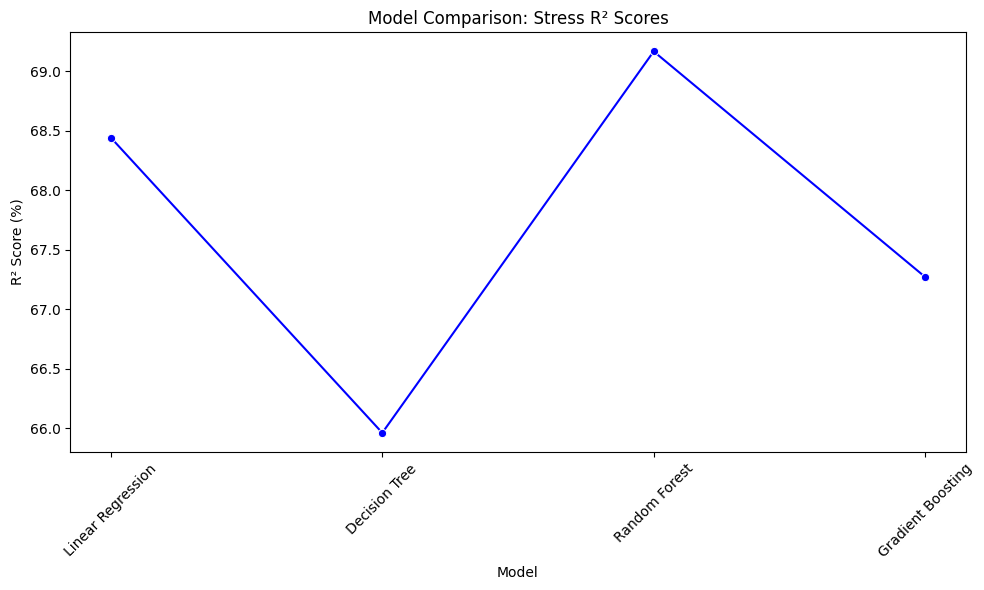

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


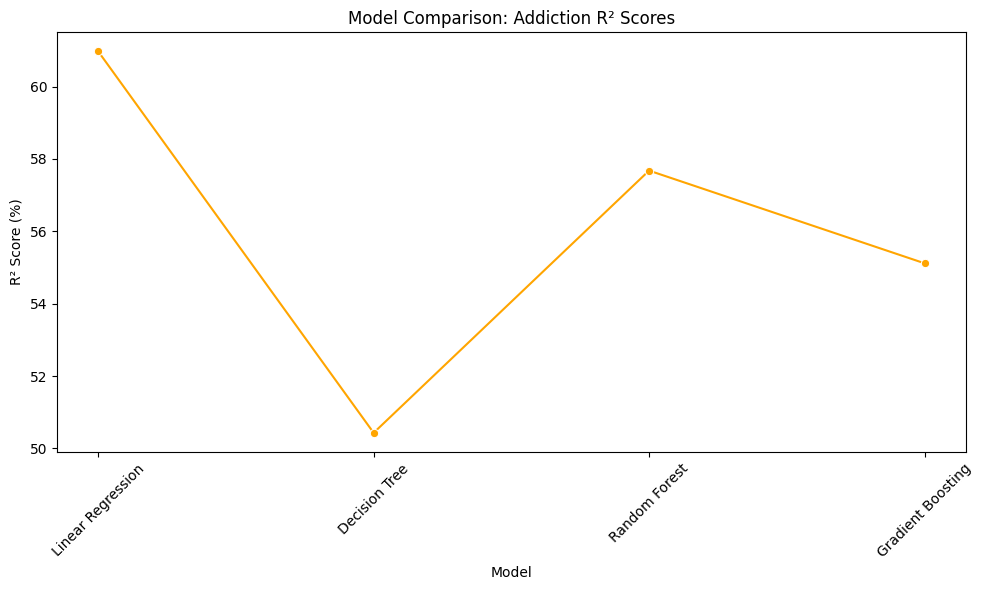

In [23]:
# Convert R² scores to percentages
results_df['Stress R2 (%)'] = results_df['Stress R2'] * 100
results_df['Addiction R2 (%)'] = results_df['Addiction R2'] * 100

# ----------------------------- Plot for Stress R² -----------------------------
plt.figure(figsize=(10, 6))

# Plot Stress R² as a line plot
sns.lineplot(x='Model', y='Stress R2 (%)', data=results_df, marker='o', color='blue')

# Customize the plot for Stress
plt.title('Model Comparison: Stress R² Scores')
plt.ylabel('R² Score (%)')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the Stress plot
plt.show()

# ----------------------------- Plot for Addiction R² -----------------------------
plt.figure(figsize=(10, 6))

# Plot Addiction R² as a line plot
sns.lineplot(x='Model', y='Addiction R2 (%)', data=results_df, marker='o', color='orange')

# Customize the plot for Addiction
plt.title('Model Comparison: Addiction R² Scores')
plt.ylabel('R² Score (%)')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the Addiction plot
plt.show()
